In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import math
import numpy as np
# установим фиксированный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10

# Модель концентрации кофе в крови
## Прямое подставление

\begin{align}
c\left ( t \right )= e^{-\alpha t}; \alpha = 0.14
\end{align}

In [ ]:
alpha = 0.14
def c(t):
  return math.exp(-1 * alpha * t)
 
x = []
y = []
numOfValues = 100
 
for i in range(numOfValues):
  x.append(i)
  y.append(c(i))
plt.plot(x, y)
plt.axhline(linewidth=0.5, color='black')
plt.axvline(linewidth=0.5, color='black')
plt.show()

NameError: ignored

## Методом Эйлера

\begin{align}
c\left ( t + h \right )= c\left ( t \right ) - \alpha * c\left ( t \right ) * h, \alpha = 0.14
\end{align}

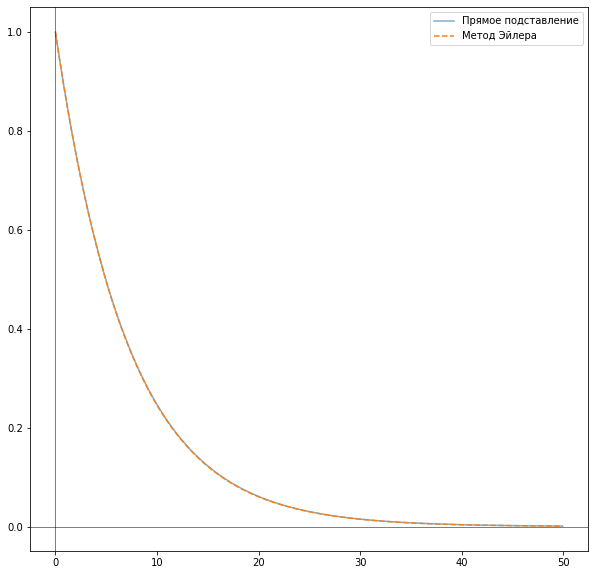

In [ ]:
alpha = 0.14
h = 0.05
 
numOfValues = 1000
x = []
y = []
y_ = []
 
x.append(0)
y.append(1)
y_.append(1)
 
for i in range(1, numOfValues):
  x.append(x[i - 1] + h)
  y.append(c(x[i]))
  y_.append(y_[i - 1] - alpha * y_[i - 1] * h)
plt.plot(x, y,  label = 'Прямое подставление', alpha = 0.6)
plt.plot(x, y_, "--", label = 'Метод Эйлера')
plt.axhline(linewidth=0.5, color='black')
plt.axvline(linewidth=0.5, color='black')
plt.legend()
plt.show()

# Модель хищник-жертва

\begin{align}
R_{n+1} = R_{n} + b \left ( n \right ) * R_{n} - a * F_{n} * R_{n}
\end{align}

\begin{align}
F_{n+1} = F_{n} - d_{f} * F_{n} + a * F_{n} * R_{n}
\end{align}

R_n - число кроликов\
F_n - число хищников\
b(n) - скорость размножения жертв\
а - процент удачных охот\
d_f - смертность хищников\
F_n * R_n - количество встреч хищник-жертва

## Просимулировать с заданными коэффициентами

\begin{align}
a = 0.0007
\end{align}

\begin{align}
b\left ( n \right ) = 0.07
\end{align}

\begin{align}
d_{f} = 0.05
\end{align}

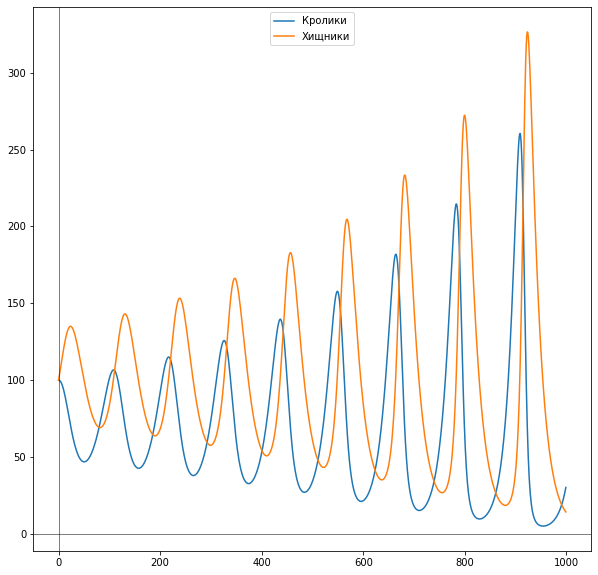

In [ ]:
a = 0.0007
b = 0.07
d_f = 0.05
numOfValues = 1000
 
R = []
F = []
 
R.append(100)
F.append(100)
 
for i in range(1, numOfValues):
  F.append(F[i - 1] - d_f * F[i - 1] + a * F[i - 1] * R[i - 1])
  if(F[i] < 0):
    F[i] = 0
  R.append(R[i - 1] + b * R[i - 1] - a * F[i - 1] * R[i - 1])
  if(R[i] < 0):
    R[i] = 0
 
plt.plot(range(numOfValues), R, label = 'Кролики')
plt.plot(range(numOfValues), F, label = 'Хищники')
plt.axhline(linewidth=0.5, color='black')
plt.axvline(linewidth=0.5, color='black')
plt.legend()
plt.show()

## Просимулировать с параметром b, зависящим от времени

\begin{align}
b\left ( n \right )= e^{-\alpha n} * 0.07; \alpha = 0.14
\end{align}

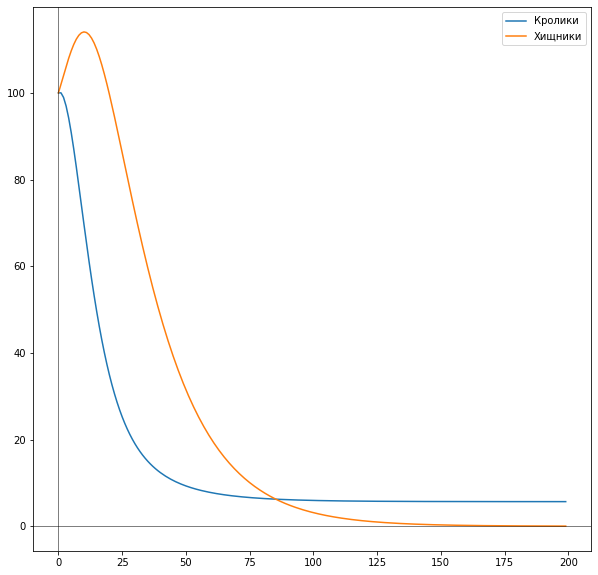

In [ ]:
R = []
F = []
b = []
numOfValues = 200
R.append(100)
F.append(100)
b.append(0.07)
for i in range(1, numOfValues):
  F.append(F[i - 1] - d_f * F[i - 1] + a * F[i - 1] * R[i - 1])
  if(F[i] < 0):
    F[i] = 0
  R.append(R[i - 1] + b[i-1] * R[i - 1] - a * F[i - 1] * R[i - 1])
  if(R[i] < 0):
    R[i] = 0
  b.append(math.exp(-alpha * i) * 0.07)
  
plt.plot(range(numOfValues), R, label = 'Кролики')
plt.plot(range(numOfValues), F, label = 'Хищники')
plt.axhline(linewidth=0.5, color='black')
plt.axvline(linewidth=0.5, color='black')
plt.legend()
plt.show()

---

\begin{align}
b\left ( n \right )= e^{-F\left ( n \right )}
\end{align}

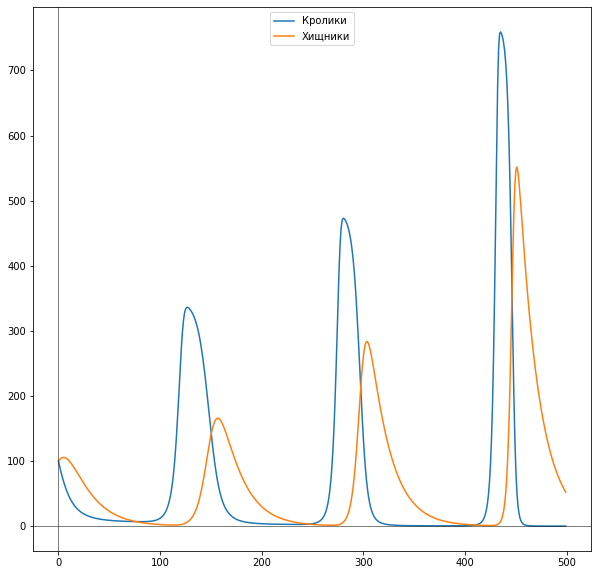

In [ ]:
R = []
F = []
b = []
numOfValues = 500
R.append(100)
F.append(100)
b.append(math.exp(-F[0]))
 
for i in range(1, numOfValues):
  F.append(F[i - 1] - d_f * F[i - 1] + a * F[i - 1] * R[i - 1])
  if(F[i] < 0):
    F[i] = 0
  R.append(R[i - 1] + b[i-1] * R[i - 1] - a * F[i - 1] * R[i - 1])
  if(R[i] < 0):
    R[i] = 0
  b.append(math.exp(-F[i]))
 
 
plt.plot(range(numOfValues), R, label = 'Кролики')
plt.plot(range(numOfValues), F, label = 'Хищники')
plt.axhline(linewidth=0.5, color='black')
plt.axvline(linewidth=0.5, color='black')
plt.legend()
plt.show()

# SIR модель распространения инфекции

\begin{align}
S\left ( t + h \right ) = S\left ( t \right ) - \beta * \frac{ S\left ( t \right ) * I\left ( t \right )}{N} * h
\end{align}

\begin{align}
I\left ( t + h \right ) = I\left ( t \right ) + h * ( \beta * \frac{ S\left ( t \right ) * I\left ( t \right )}{N} - \gamma * I\left ( t \right ))
\end{align}

\begin{align}
R\left ( t + h \right ) = R\left ( t \right ) + h * \gamma * I(t)
\end{align}

N = S+I+R - размер популяции\
S - подверженные заболеванию\
I - инфицированные\
R - летальные исходы/получили иммунитет\
β - <среднее количество встреч> * <вероятность передать болезнь>\
γ - смертность/излечимость

*Возьмём данные статистики короновируса в Нижегородской области из сайта coronavirus-control.ru на момент 20.09.20 числа.*

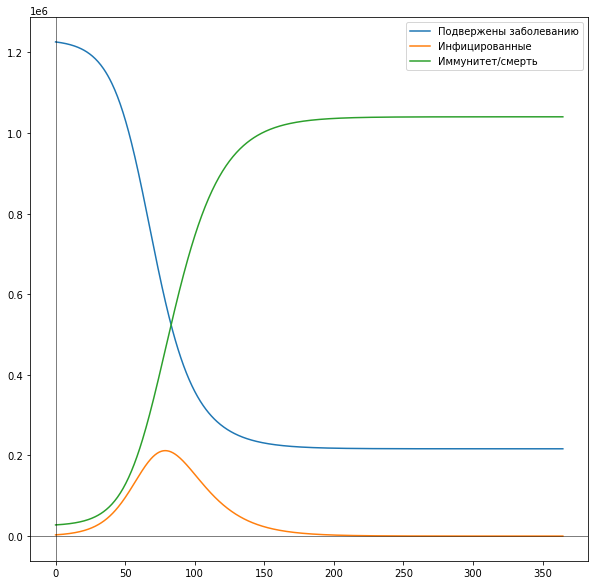

In [ ]:
N = 1257000
S = 1257000 - 3027 - 27194 - 543
I = 3027
R = 27194 + 543
beta = 50 * 0.003 # 50 встреч за полдня
gamma = 0.07
numOfValues = 365 * 2
h = 0.5 # полдня
 
t = []
S_ = []
I_ = []
R_ = []
t.append(0)
S_.append(S)
I_.append(I)
R_.append(R)
for i in range(1, numOfValues):
  t.append(t[i-1] + h)
  S_.append(S_[i-1] - beta * S_[i-1]*I_[i-1]/N*h)
  I_.append(I_[i-1] + h * (beta * S_[i-1]*I_[i-1]/N - gamma * I_[i-1]))
  R_.append(R_[i-1] + h * gamma * I_[i-1])
 
plt.plot(t, S_, label = 'Подвержены заболеванию')
plt.plot(t, I_, label = 'Инфицированные')
plt.plot(t, R_, label = 'Иммунитет/смерть')
plt.axhline(linewidth=0.5, color='black')
plt.axvline(linewidth=0.5, color='black')
plt.legend()
plt.show()

А что, если никто не будет носить маски коэффициент beta увеличится в 2 раза?

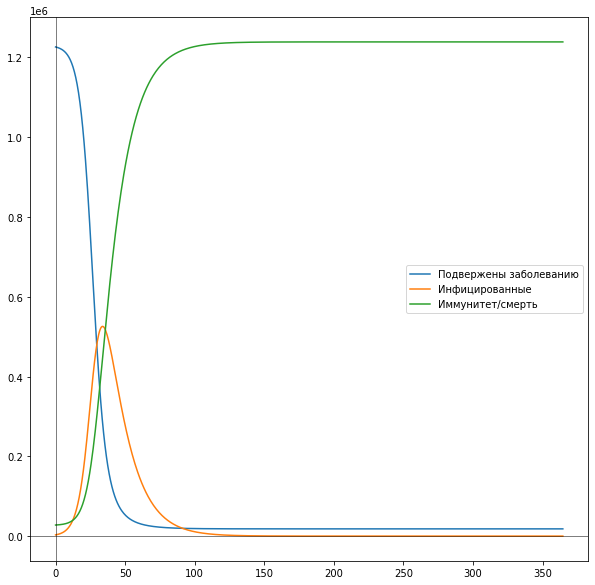

In [ ]:
N = 1257000
S = 1257000 - 3027 - 27194 - 543
I = 3027
R = 27194 + 543
beta = 50 * 0.006 # 50 встреч за полдня
gamma = 0.07
numOfValues = 365 * 2
h = 0.5 # полдня
 
t = []
S_ = []
I_ = []
R_ = []
t.append(0)
S_.append(S)
I_.append(I)
R_.append(R)
for i in range(1, numOfValues):
  t.append(t[i-1] + h)
  S_.append(S_[i-1] - beta * S_[i-1]*I_[i-1]/N*h)
  I_.append(I_[i-1] + h * (beta * S_[i-1]*I_[i-1]/N - gamma * I_[i-1]))
  R_.append(R_[i-1] + h * gamma * I_[i-1])
 
plt.plot(t, S_, label = 'Подвержены заболеванию')
plt.plot(t, I_, label = 'Инфицированные')
plt.plot(t, R_, label = 'Иммунитет/смерть')
plt.axhline(linewidth=0.5, color='black')
plt.axvline(linewidth=0.5, color='black')
plt.legend()
plt.show()

# Моделирование линейного движения тела

\begin{align}
v\left ( t + h \right ) = v\left ( t \right ) + h * \frac{ F\left ( t \right )}{m}
\end{align}

\begin{align}
x\left ( t + h \right ) = x\left ( t \right ) + h * v\left ( t + h \right )
\end{align}

---

\begin{align}
F\left ( t \right ) = 10
\end{align}

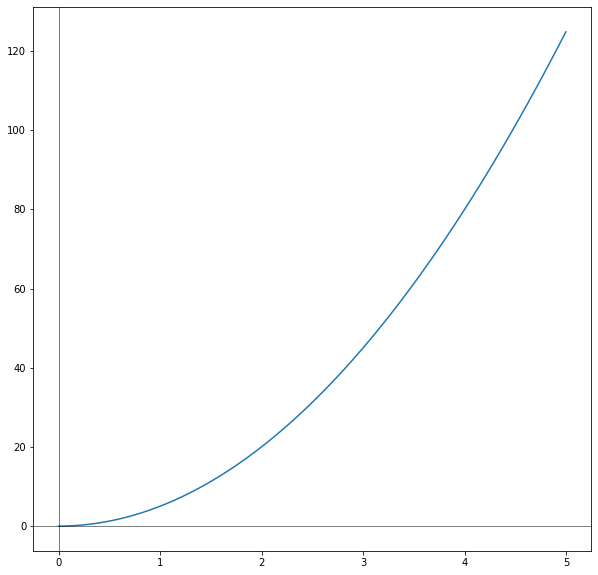

In [ ]:
t = []
x = []
v = []
f = 10
numOfValues = 1000
h = 0.005
m = 1
t.append(0)
v.append(0)
x.append(0)
for i in range(1, numOfValues):
  t.append(t[i-1]+h)
  v.append(v[i-1] + h * f/m)
  x.append(x[i-1] + h*v[i])
 
plt.plot(t, x)
plt.axhline(linewidth=0.5, color='black')
plt.axvline(linewidth=0.5, color='black')
plt.show()

---

\begin{align}
F\left ( t \right ) = t
\end{align}

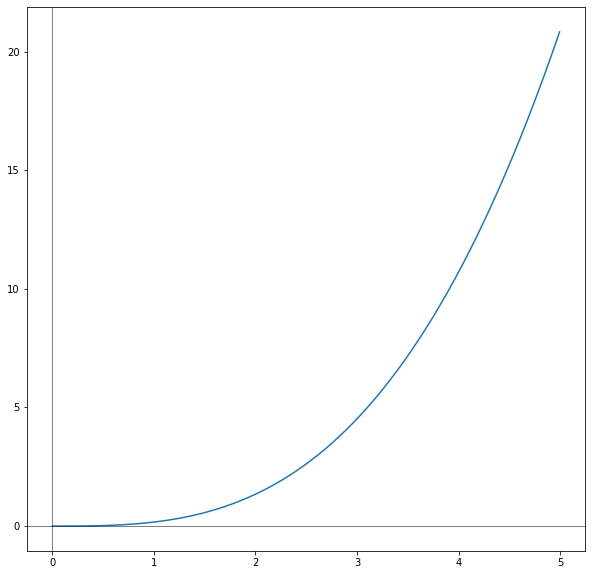

In [ ]:
t = []
x = []
v = []
f = []
t.append(0)
f.append(0)
v.append(0)
x.append(0)
for i in range(1, numOfValues):
  t.append(t[i-1]+h)
  f.append(t[i])
  v.append(v[i-1] + h * f[i]/m)
  x.append(x[i-1] + h*v[i])
 
plt.plot(t, x)
plt.axhline(linewidth=0.5, color='black')
plt.axvline(linewidth=0.5, color='black')
plt.show()

---

\begin{align}
F\left ( t \right ) = e^{-\alpha t}; \alpha = 0.14
\end{align}

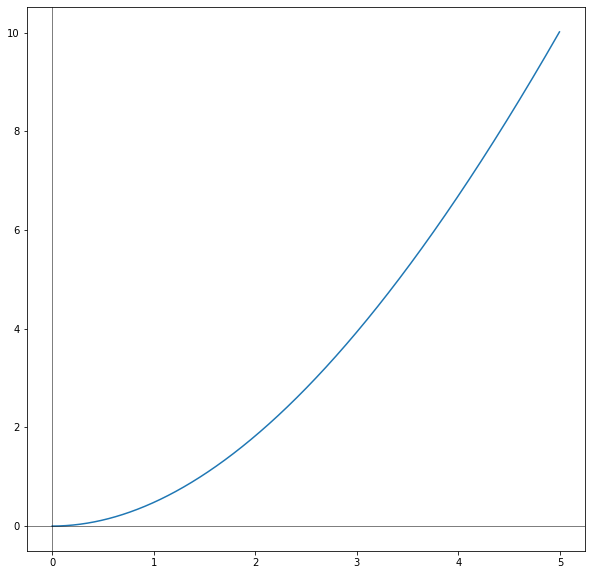

In [ ]:
t = []
x = []
v = []
f = []
t.append(0)
f.append(1)
v.append(0)
x.append(0)
for i in range(1, numOfValues):
  t.append(t[i-1]+h)
  f.append(math.exp(-1 * alpha * t[i]))
  v.append(v[i-1] + h * f[i]/m)
  x.append(x[i-1] + h*v[i])
 
plt.plot(t, x)
plt.axhline(linewidth=0.5, color='black')
plt.axvline(linewidth=0.5, color='black')
plt.show()

---

\begin{align}
F\left ( t \right ) = sin(t) * t
\end{align}

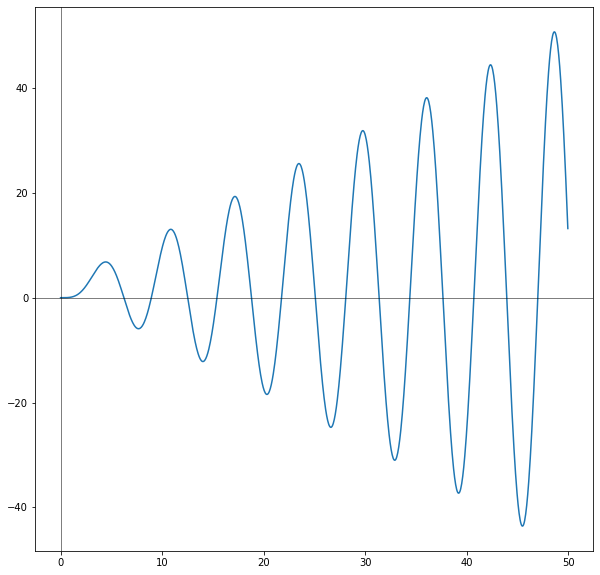

In [ ]:
t = []
x = []
v = []
f = []
h = 0.05
t.append(0)
f.append(0)
v.append(0)
x.append(0)
for i in range(1, numOfValues):
  t.append(t[i-1]+h)
  f.append(math.sin(t[i]) * t[i])
  v.append(v[i-1] + h * f[i]/m)
  x.append(x[i-1] + h*v[i])
 
plt.plot(t, x)
plt.axhline(linewidth=0.5, color='black')
plt.axvline(linewidth=0.5, color='black')
plt.show()

---

\begin{align}
F\left ( t \right ) = cos(t) * t
\end{align}

In [ ]:
t = []
x = []
v = []
f = []
h = 0.05
t.append(0)
f.append(0)
v.append(0)
x.append(0)
for i in range(1, numOfValues):
  t.append(t[i-1]+h)
  f.append(math.cos(t[i]) * t[i])
  v.append(v[i-1] + h * f[i]/m)
  x.append(x[i-1] + h*v[i])
 
plt.plot(t, x)
plt.axhline(linewidth=0.5, color='black')
plt.axvline(linewidth=0.5, color='black')
plt.show()

NameError: ignored

In [ ]:
x = np.random.rand(100)
multiply = 1
sum_ln = 0
for i in x:
  multiply *= i
  sum_ln += math.log(i)
sum_ln = math.exp(sum_ln)
print(multiply - sum_ln)

NameError: ignored